In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
train_path="/content/drive/MyDrive/Image_classification/train"
test_path="/content/drive/MyDrive/Image_classification/valid"
val_path="/content/drive/MyDrive/Image_classification/test"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [ ]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)
    

In [ ]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)
    

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x.shape,test_x.shape,val_x.shape

((60, 224, 224, 3), (10, 224, 224, 3), (20, 224, 224, 3))

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 60 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'landscape': 0, 'potrait': 1}

In [ ]:
train_y=training_set.classes

In [ ]:
test_y=test_set.classes

In [ ]:
val_y=val_set.classes

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((60,), (10,), (20,))

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=2,shuffle=True)

Epoch 1/10
30/30 [==============================] - 47s 2s/step - loss: 1.0464 - accuracy: 0.6500 - val_loss: 2.5165 - val_accuracy: 0.3000
Epoch 2/10
30/30 [==============================] - 45s 2s/step - loss: 0.1975 - accuracy: 0.9000 - val_loss: 4.5838 - val_accuracy: 0.3500
Epoch 3/10
30/30 [==============================] - 46s 2s/step - loss: 0.0301 - accuracy: 0.9833 - val_loss: 3.1744 - val_accuracy: 0.3500
Epoch 4/10
30/30 [==============================] - 45s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.2402 - val_accuracy: 0.3000
Epoch 5/10
30/30 [==============================] - 46s 2s/step - loss: 8.2671e-04 - accuracy: 1.0000 - val_loss: 3.2626 - val_accuracy: 0.2500
Epoch 6/10
30/30 [==============================] - 45s 2s/step - loss: 7.3765e-04 - accuracy: 1.0000 - val_loss: 3.2565 - val_accuracy: 0.3000
Epoch 6: early stopping


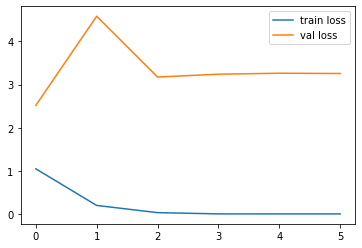

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

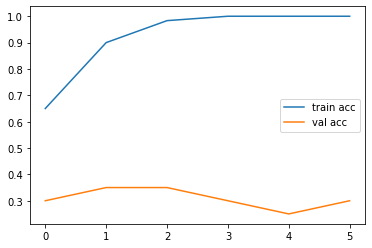

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=2)

5/5 [==============================] - 6s 1s/step - loss: 0.6812 - accuracy: 0.6000


[0.6811708211898804, 0.6000000238418579]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_pred,test_y)

0.6

In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.20      1.00      0.33         1

    accuracy                           0.60        10
   macro avg       0.60      0.78      0.52        10
weighted avg       0.92      0.60      0.68        10



In [ ]:
confusion_matrix(y_pred,test_y)

array([[5, 4],
       [0, 1]])

In [ ]:
#Save the model
model.save("vgg-rps-final.h5")

**Testing the model**

In [ ]:
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
import cv2

In [ ]:
model=load_model("/content/vgg-rps-final.h5")

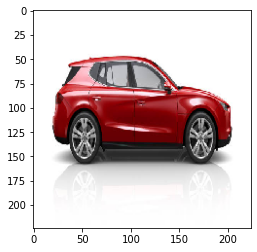

landscape


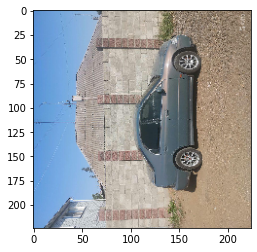

potrait


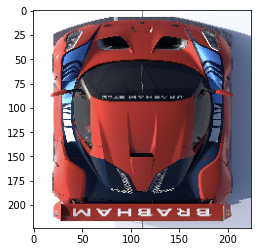

potrait


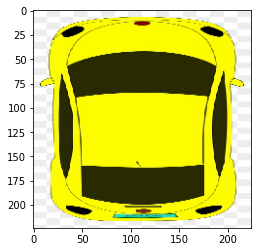

potrait


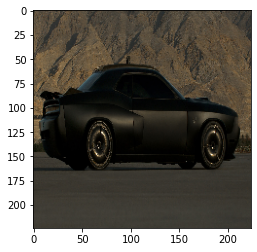

landscape


In [ ]:
path="/content/drive/MyDrive/Image_classification/test_images"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("landscape")
    elif pred[0][1]>0.5:
        print("potrait")
    else:
        print("Unknown")